In [49]:
# Official GitHub implementation
from groundingdino.util.inference import load_model, load_image, predict, annotate
import cv2
import matplotlib.pyplot as plt

In [50]:
model = load_model("../GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py", "../GroundingDINO/weights/groundingdino_swint_ogc.pth")

final text_encoder_type: bert-base-uncased


In [51]:
model

GroundingDINO(
  (transformer): Transformer(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-5): 6 x DeformableTransformerEncoderLayer(
          (self_attn): MultiScaleDeformableAttention(
            (sampling_offsets): Linear(in_features=256, out_features=256, bias=True)
            (attention_weights): Linear(in_features=256, out_features=128, bias=True)
            (value_proj): Linear(in_features=256, out_features=256, bias=True)
            (output_proj): Linear(in_features=256, out_features=256, bias=True)
          )
          (dropout1): Dropout(p=0.0, inplace=False)
          (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (linear1): Linear(in_features=256, out_features=2048, bias=True)
          (dropout2): Dropout(p=0.0, inplace=False)
          (linear2): Linear(in_features=2048, out_features=256, bias=True)
          (dropout3): Dropout(p=0.0, inplace=False)
          (norm2): LayerNorm((256,), eps=1e-05, elementwise_aff

/Users/willrathgeb/CalHacks2023/calHacks2023/venv/lib/python3.9/site-packages/transformers/modeling_utils.py:905: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/Users/willrathgeb/CalHacks2023/calHacks2023/venv/lib/python3.9/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/Users/willrathgeb/CalHacks2023/calHacks2023/venv/lib/python3.9/site-packages/torch/utils/checkpoint.py:61: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


Probability: 93.17073822021484 %


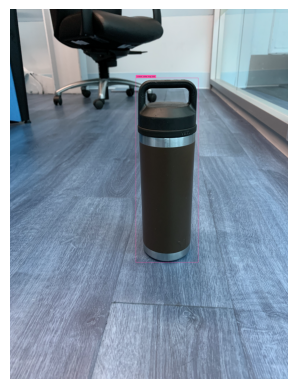

In [65]:
IMAGE_PATH = "../GroundingDINO/.asset/cat_dog.jpeg"
IMAGE_PATH = "../images/real_bottle.jpg"
TEXT_PROMPT = "a black and silver coffee mug"
BOX_TRESHOLD = 0.50
TEXT_TRESHOLD = 0.30

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD,
    device='cpu'
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)
cv2.imwrite("annotated_image.jpg", annotated_frame)

plt.imshow(annotated_frame)
plt.axis('off')
print("Probability:", logits.item()*100, "%")


# Results
bottle_on_table2.jpg - 86%, prompt="water bottle", correct
bottle_w_distractions.jpg - 74%, prompt="water bottle", correct
bottles_on_table_far.jpg - 64%, prompt="water bottle", chose water bottle to the right
bottles_on_table_far.jpg - 50%, prompt="water bottle, water bottle", chose water bottle to the right

numpy.ndarray

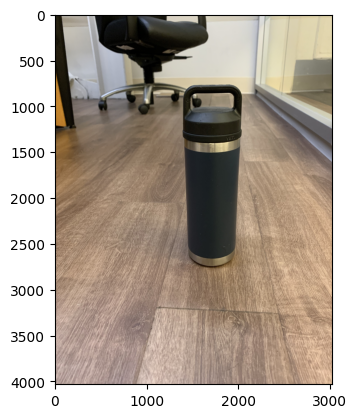

In [64]:
plt.imshow(image_source)
# use plt to display an image, read from a filepath named IMAGE_PATH
